# Problem Statement 
1. **Project Kickoff:**
   Starting a sentiment analysis project with a curated product review dataset. Initial steps involve thorough data cleaning and feature extraction to prep for machine learning.

2. **Model Implementation:**
   Employing Logistic Regression, Random Forest, and XGBoost for sentiment analysis. Configuring and training models, fine-tuning parameters to maximize their effectiveness.

3. **Model Evaluation Path:**
   Future plans include evaluating model performance using metrics like accuracy and precision on a validation dataset. The goal is to pick the best model for understanding diverse customer sentiments towards products.

# Important Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import re, nltk, spacy, string
import en_core_web_sm


In [ ]:
nlp = spacy.load('en_core_web_sm',  disable=["parser", "ner"])

This line of code uses the spaCy library to load a pre-trained English language model with the name 'en_core_web_sm'. The model loaded here is a small English model that includes word vectors but disables the parser and named entity recognition (NER) components.

These options are useful for controlling the visual representation of DataFrames, especially when dealing with large datasets or when you want to customize the display to suit your preferences.

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/sample30.csv')

## Exploratory Data Analysis

In [ ]:
df.shape

(30000, 15)

So in this dataset we have Thirty Thousand rows and fifteen columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage



*   We can clearly observe that there are many columns that contains the null values.
*   We have to remove the columns that have null vlaues or replace the null values with logical values.



In [ ]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


Below is the data dictionary that provides information on the type of information contained in each attribute for reference

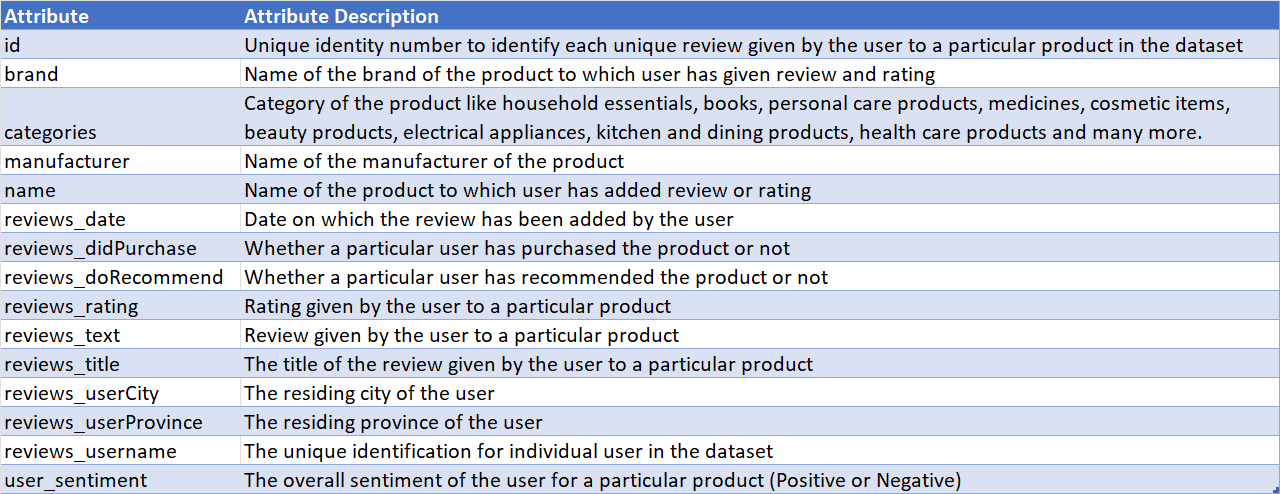

# Data Cleaning

#### Handling NULL values

In [ ]:
# Finding total numbers values of each values and its percentage for each columns

null_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count,null_percentage], axis = 1, keys = ['count','percentage'])
null_data

,count,percentage
reviews_userProvince,29830,99.433333
reviews_userCity,28071,93.570000
reviews_didPurchase,14068,46.893333
reviews_doRecommend,2570,8.566667
reviews_title,190,0.633333
manufacturer,141,0.470000
reviews_username,63,0.210000
reviews_date,46,0.153333
user_sentiment,1,0.003333


Observation



*   reviews_userProvince, review_userCity, reviews_didPurchase have 99% , 93% and 46% of null values respectively. So they are not suitable for the modeling hence it will be removed from the dataset.



##### removing the Above said columns from the dataset

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.drop(columns = ['reviews_userProvince','reviews_userCity','reviews_didPurchase'], inplace = True)

In [ ]:
# Checking for null again

null_count = df_clean[df_clean.columns[df_clean.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df_clean[df_clean.columns[df_clean.isna().any()]].isna().sum() * 100 / df_clean.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count,null_percentage], axis = 1, keys = ['count','percentage'])
null_data

,count,percentage
reviews_doRecommend,2570,8.566667
reviews_title,190,0.633333
manufacturer,141,0.470000
reviews_username,63,0.210000
reviews_date,46,0.153333
user_sentiment,1,0.003333


---
Checking reviews_doRecommend column

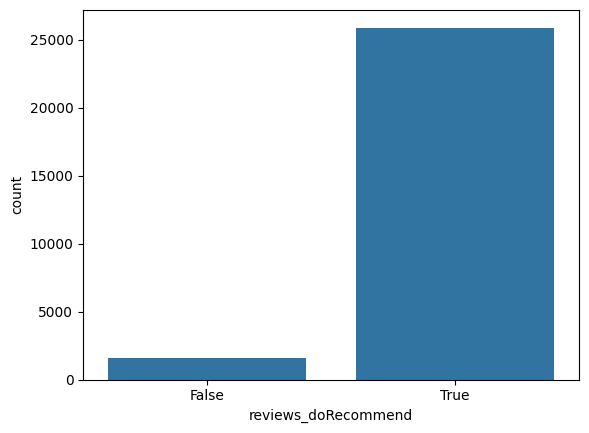

In [ ]:
sns.countplot(x = 'reviews_doRecommend', data = df_clean)
plt.show()

From the above distribution of the reviews_doRecommend column it is clear almost 25000 times the TRUE value is appeared and very less FLASE value has appeared. So this feature will hardly have any effect in the modeling as it has very less things to learn from it for the model. Hence, we are removing it from the dataset.

In [ ]:
df_clean.drop(columns = ['reviews_doRecommend'], inplace = True)

In [ ]:
# Checking NULLs again
null_count = df_clean[df_clean.columns[df_clean.isna().any()]].isna().sum().sort_values(ascending=False)
null_perc = (df_clean[df_clean.columns[df_clean.isna().any()]].isna().sum() * 100 / df_clean.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count, null_perc], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage
reviews_title,190,0.633333
manufacturer,141,0.470000
reviews_username,63,0.210000
reviews_date,46,0.153333
user_sentiment,1,0.003333


---
Handling NULL values in reviews_title

review_title is most important column in the dataset is it will state the sentiment of the product by the customer as well as it has only 0.63% of null value, for which we can simply remove those rows from the dataset.

In [ ]:
df_clean = df_clean[~ df_clean.reviews_title.isna() ]

In [ ]:
df_clean.shape

(29810, 11)

In [ ]:
# Checking NULLs again
null_count = df_clean[df_clean.columns[df_clean.isna().any()]].isna().sum().sort_values(ascending=False)
null_perc = (df_clean[df_clean.columns[df_clean.isna().any()]].isna().sum() * 100 / df_clean.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count, null_perc], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage
manufacturer,141,0.472996
reviews_username,62,0.207984
reviews_date,46,0.154311
user_sentiment,1,0.003355


---

Handling NULL values in reviews_username

It contains the unique identity of the users in the columns so it may help in the modeling. So, we will just remove the null values from it as there are only 0.2% of them.

In [ ]:
df_clean = df_clean[~ df_clean.reviews_username.isna() ]

In [ ]:
df_clean.shape

(29748, 11)

In [ ]:
# Checking NULLs again
null_count = df_clean[df_clean.columns[df_clean.isna().any()]].isna().sum().sort_values(ascending=False)
null_perc = (df_clean[df_clean.columns[df_clean.isna().any()]].isna().sum() * 100 / df_clean.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count, null_perc], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage
manufacturer,141,0.473981
reviews_date,40,0.134463
user_sentiment,1,0.003362


---

Handling NULL values in user_sentiment

* We can see that there is only one row that has the null value in it. For that reason we can manually read the review and update the value.


In [ ]:
df_clean[ df_clean.user_sentiment.isna() ]

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,7.87E+11,NaN


* After reding the only review we can clearly say that the review is positive so we are updating it with the positive value.

In [ ]:
df_clean[ df_clean.user_sentiment.isna() ].user_sentiment


28354    NaN
Name: user_sentiment, dtype: object

In [ ]:
df_clean.user_sentiment.fillna('Positive', inplace=True)


In [ ]:
# Checking NULLs again
null_count = df_clean[df_clean.columns[df_clean.isna().any()]].isna().sum().sort_values(ascending=False)
null_perc = (df_clean[df_clean.columns[df_clean.isna().any()]].isna().sum() * 100 / df_clean.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count, null_perc], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage
manufacturer,141,0.473981
reviews_date,40,0.134463


Both manufacturer and review_date has no effect in sentiment analysis or in recommended systems so we are not handeling the NULL values of those columns.

In [ ]:
df_clean.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative


# Data Analysis

Checking Distribution of reviews_rating column

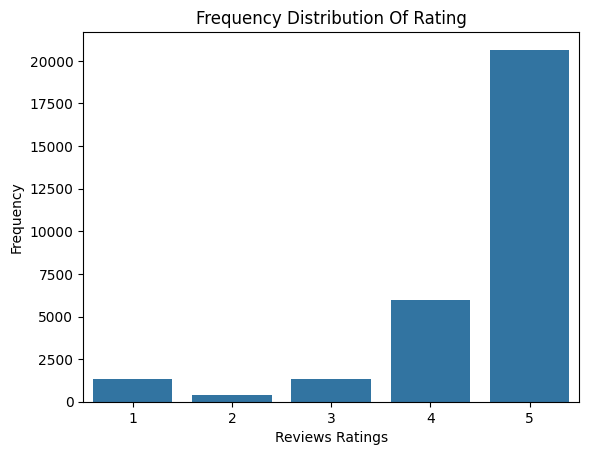

In [ ]:
sns.countplot(x = 'reviews_rating' , data = df_clean)
plt.title('Frequency Distribution Of Rating')
plt.xlabel('Reviews Ratings')
plt.ylabel('Frequency')
plt.show()

* As we can see that most of the rating is on the right side.
* So it will create imbalance in the dataset.
* We will handel it later on.

Checking Top 5 Brands with negative reviews

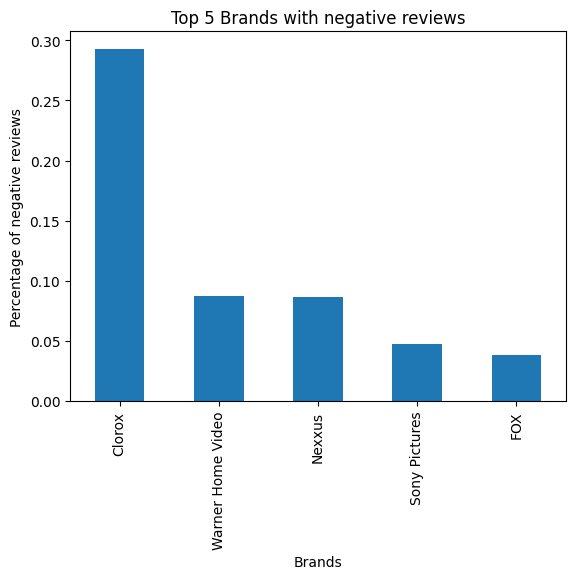

In [ ]:
df_clean[ df_clean.user_sentiment == 'Negative' ].brand.value_counts(normalize=True, ascending=False).head(5).plot(kind='bar')
plt.title("Top 5 Brands with negative reviews")
plt.xlabel("Brands")
plt.ylabel("Percentage of negative reviews")
plt.show()

* It is clear from the above graph that Clorox have the most negetive riviews.
* Almost 30% of the negetive reviews is of Clorox.

Checking for top 5 brands with positive reviews

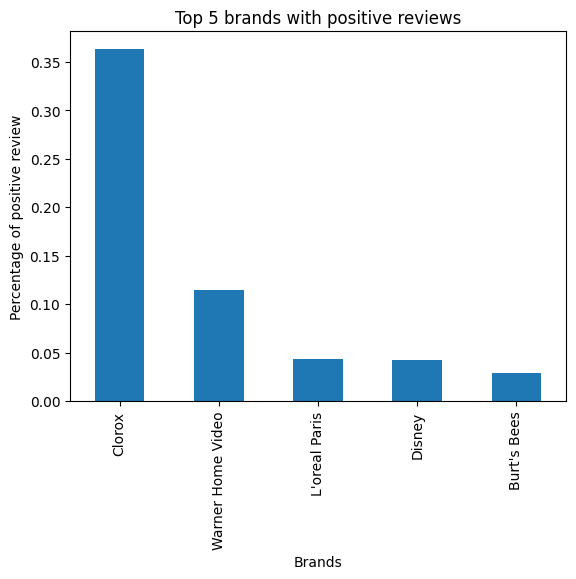

In [ ]:
df_clean[df_clean.user_sentiment == 'Positive'].brand.value_counts(normalize = True, ascending = False).head(5).plot(kind = 'bar')
plt.title("Top 5 brands with positive reviews")
plt.xlabel('Brands')
plt.ylabel("Percentage of positive review")
plt.show()

* surprisingly Clorox has most Positive review and most negetive reviews.

In [ ]:
df_clean.brand.value_counts(normalize = True).head(5)

Clorox               0.355116
Warner Home Video    0.111739
Disney               0.040238
L'oreal Paris        0.039868
FOX                  0.029817
Name: brand, dtype: float64

* After observation we found out that all the data that we have 35% are of Clorox So it that the most Positive and most Negetive reviews available.

Checking the reviews Based on the review year

In [ ]:
# Before type conversion
df_clean.reviews_date.dtype

dtype('O')

* We will first convert  reviews_date to date type.
* Then we will get the year component from the table.

In [ ]:
df_clean['reviews_date'] = pd.to_datetime(df_clean['reviews_date'], errors ='coerce')

In [ ]:
# After type conversion
df_clean.reviews_date.dtype

datetime64[ns, UTC]

In [ ]:
# Getting year component from date
df_clean.reviews_date.dt.year

0        2012.0
1        2017.0
2        2017.0
3        2016.0
4        2016.0
          ...  
29995    2017.0
29996    2017.0
29997    2017.0
29998    2017.0
29999    2017.0
Name: reviews_date, Length: 29748, dtype: float64

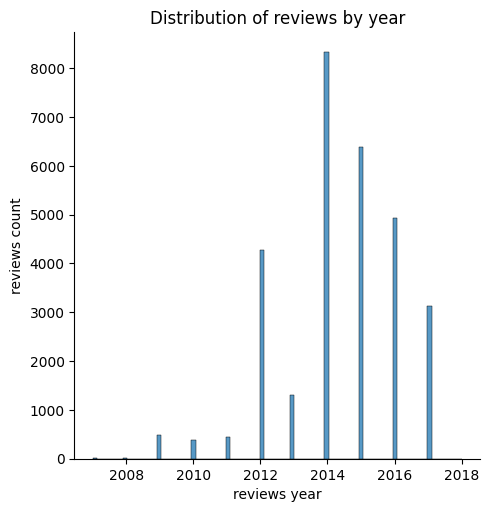

In [ ]:
# Creating a distribution plot based on reviews year
sns.displot(data=df_clean, x=df_clean.reviews_date.dt.year)
plt.title("Distribution of reviews by year")
plt.xlabel("reviews year")
plt.ylabel("reviews count")
plt.show()

Checking Movie catagory by rating

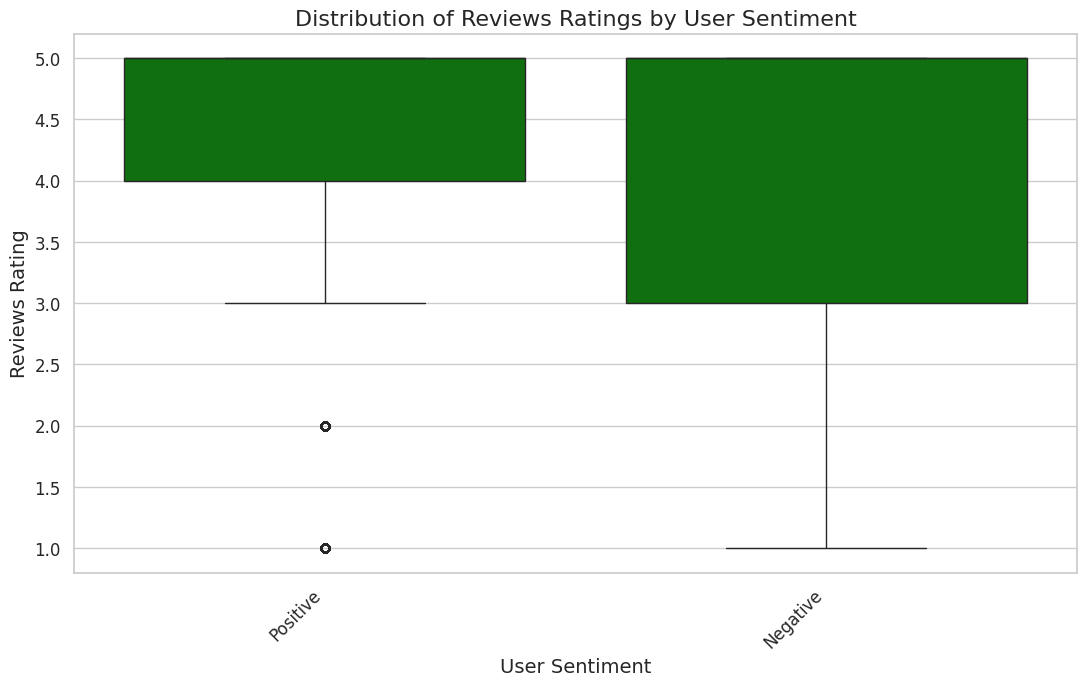

In [ ]:
plt.figure(figsize=[12, 8])
sns.set(style="whitegrid")
sns.boxplot(data=df_clean, x='user_sentiment', y='reviews_rating', color='green')
plt.title('Distribution of Reviews Ratings by User Sentiment', fontsize=16)
plt.xlabel('User Sentiment', fontsize=14)
plt.ylabel('Reviews Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(pad=4)
plt.show()
plt.show()

In [ ]:
# count of negetive riviews by rating

print(df_clean[ (df_clean.user_sentiment == 'Negative')].groupby(['reviews_rating']).count().user_sentiment)
print("------------")
print(df_clean[ (df_clean.user_sentiment == 'Positive')].groupby(['reviews_rating']).count().user_sentiment)

reviews_rating
1     585
2     137
3     217
4     548
5    1848
Name: user_sentiment, dtype: int64
------------
reviews_rating
1      776
2      272
3     1115
4     5444
5    18806
Name: user_sentiment, dtype: int64


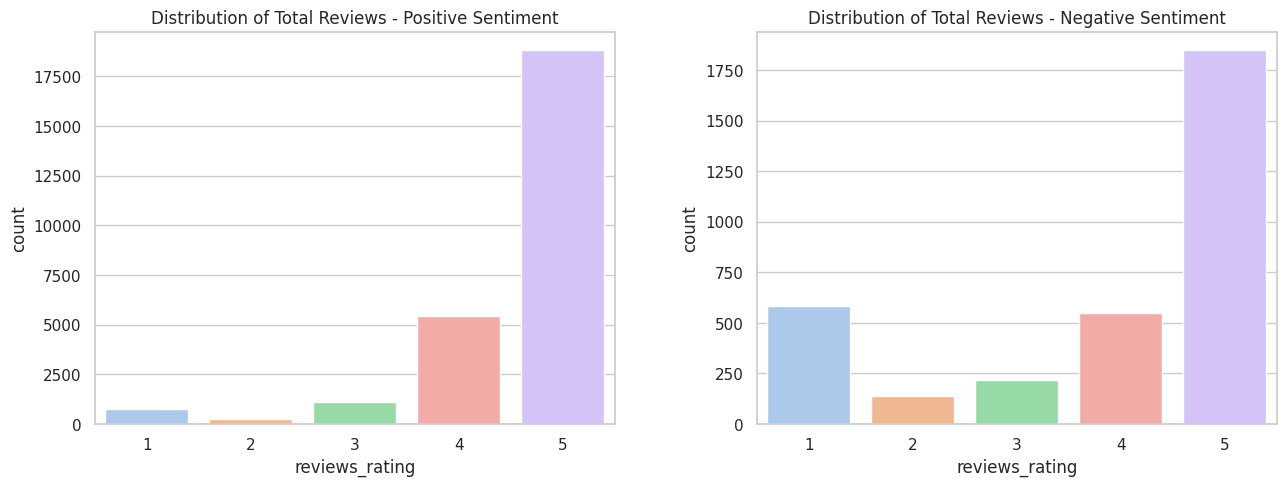

In [ ]:
plt.figure(figsize=[14, 6])

# Bar plot for positive sentiment reviews
plt.subplot(1, 2, 1)
sns.countplot(data=df_clean[df_clean['user_sentiment'] == 'Positive'], x='reviews_rating', palette='pastel')
plt.title('Distribution of Total Reviews - Positive Sentiment')

# Bar plot for negative sentiment reviews
plt.subplot(1, 2, 2)
sns.countplot(data=df_clean[df_clean['user_sentiment'] == 'Negative'], x='reviews_rating', palette='pastel')
plt.title('Distribution of Total Reviews - Negative Sentiment')

plt.tight_layout(pad=4)
plt.show()

# **Final Conclusion of the anaysis**

* It is seen that few brands that have more number of negative reviews but still have higher ratings like 4 and 5.

* There may be some flaw in the give data as it was observed that there is some kind of diffenence in the rating given by the user and then the user sentiment provided by the same user.

This may happen if the user gave his rating first or too early then after using the product he might face some problem and then provieded the review late.

* In this specific purpose we will not treat the problem and move ahead for the data-preprocessing parts.

#Type Conversion:

before starting the preprocessing we have to make sure that the type of each column is proper as different data-type for the column may cause some problems.

In [ ]:
print(df_clean.columns)

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_username',
       'user_sentiment'],
      dtype='object')


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29748 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                29748 non-null  object             
 1   brand             29748 non-null  object             
 2   categories        29748 non-null  object             
 3   manufacturer      29607 non-null  object             
 4   name              29748 non-null  object             
 5   reviews_date      29700 non-null  datetime64[ns, UTC]
 6   reviews_rating    29748 non-null  int64              
 7   reviews_text      29748 non-null  object             
 8   reviews_title     29748 non-null  object             
 9   reviews_username  29748 non-null  object             
 10  user_sentiment    29748 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(9)
memory usage: 3.7+ MB


In [ ]:
# List of columns to be converted to string
columns_to_convert = ['brand', 'categories', 'manufacturer', 'name', 'reviews_text', 'reviews_title', 'reviews_username']

# Convert columns to string data type
df_clean[columns_to_convert] = df_clean[columns_to_convert].astype(str)

# **Data Preprocessing**

In [ ]:
# Cerating a copy of the preprocessing data for safety

df_prep = df_clean.copy()

In [ ]:
df_prep.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45+00:00,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06 00:00:00+00:00,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21 00:00:00+00:00,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative


combining the review_text and review_title in to review_combined and then droping the review_text and review_title  columns.

In [ ]:
df_prep['reviews_combined'] = df_prep['reviews_text'] + " " + df_prep['reviews_title']
df_prep.drop(columns=['reviews_text', 'reviews_title'], inplace=True)

In [ ]:
df_prep.shape

(29748, 10)

Removing the columsn that are unnecessary i.e., categories	manufacturer and reviews_date


In [ ]:
# List of columns to be removed
columns_to_remove = ['categories', 'manufacturer', 'reviews_date']

# Drop the specified columns
df_prep = df_prep.drop(columns=columns_to_remove)


In [ ]:
df_prep.head(1)

,id,brand,name,reviews_rating,reviews_username,user_sentiment,reviews_combined
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,i love this album. it's very good. more to the...


# creating dataframe only for sentiment analysis.

so we will keep only the required columns

In [ ]:
df_sent = df_prep[['id','name','reviews_combined', 'user_sentiment']]
df_sent.head()

,id,name,reviews_combined,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. Good,Positive
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,Negative
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,Negative


## Removing the punctuations from the sentences

In [ ]:
def to_lower(sent):
  return sent.lower()

In [ ]:
import string

def remove_unnecessary_punctuation(sentence):
    # Lower case
    sentence = to_lower(sentence)

    # Define a set of unnecessary punctuation
    unnecessary_punctuations = set(string.punctuation) - {'-', "'"}  # Keep hyphen and apostrophe

    # Remove unnecessary punctuation from the sentence
    cleaned_sentence = ''.join(char for char in sentence if char not in unnecessary_punctuations)

    return cleaned_sentence


In [ ]:
df_sent['review_cleaned'] = df_sent['reviews_combined'].apply(remove_unnecessary_punctuation)

In [ ]:
df_sent.head()

,id,name,reviews_combined,user_sentiment,review_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Positive,i love this album it's very good more to the h...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Positive,good flavor this review was collected as part ...
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. Good,Positive,good flavor good
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,Negative,i read through the reviews on here before look...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,Negative,my husband bought this gel for us the gel caus...


## Handeling the stop words

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)


{"won't", 'am', 'just', 'from', "you've", 'both', 'ourselves', 'they', 'isn', 'few', 'ma', "you're", 'on', 'more', 'our', 'below', 'out', 'haven', 're', 'd', 'no', 'her', 'wouldn', 's', 'being', 'again', 'have', 'same', 'its', 'then', 'a', 'has', 'down', 'your', 'before', 'now', 'the', "weren't", 'own', 'weren', 'under', 'above', 'me', 'll', 'did', "should've", 'an', 'she', 'most', 'of', 't', 'are', 'during', "don't", 'not', "aren't", "mustn't", "doesn't", 'once', 'yours', "wasn't", 'by', 'aren', 'up', 'other', 'itself', 'myself', 'these', 'him', 'don', 'that', "that'll", 'themselves', 'does', 'this', 'as', 'shan', 'there', 'doing', 'hers', 'had', 'where', 'after', 'be', "couldn't", 'it', "hadn't", 'couldn', 'y', "shouldn't", 'yourself', 'here', "didn't", 'if', 'but', 'some', 'his', 'he', 'himself', "haven't", "it's", 'nor', 'or', 'at', "you'd", 'what', 'between', 'hadn', 'hasn', "shan't", 'yourselves', 'further', 'who', 'we', 'should', 'you', 'their', 'been', 'through', 'over', 'so', 

In [ ]:
def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(sentence) # It parse the words from the sentance.
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_sentence)

In [ ]:
df_sent['review_cleaned'] = df_sent['review_cleaned'].apply(remove_stopwords)
df_sent.head(1)

,id,name,reviews_combined,user_sentiment,review_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Positive,love album 's good hip hop side current pop so...


## Applying the lemmatization

lemmatization : Lemmatization is the process of reducing words to their base or root form, aiming to group together different inflections of a word.

Example:
- Word: "running"
- Lemmatized form: "run"

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def lemmatize_sentence_spacy(sentence):
    # Process the sentence using spaCy
    doc = nlp(sentence)

    # Lemmatize each token in the sentence
    lemmatized_words = [token.lemma_ for token in doc]

    return ' '.join(lemmatized_words)

In [ ]:
df_sent['review_lemmatize'] = df_sent['review_cleaned'].apply(lemmatize_sentence_spacy)
df_sent.head(2)

,id,name,reviews_combined,user_sentiment,review_cleaned,review_lemmatize
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Positive,love album 's good hip hop side current pop so...,love album 's good hip hop side current pop so...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Positive,good flavor review collected part promotion good,good flavor review collect part promotion good


In [ ]:
df_sent.head(10)

,id,name,reviews_combined,user_sentiment,review_cleaned,review_lemmatize
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Positive,love album 's good hip hop side current pop so...,love album 's good hip hop side current pop so...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Positive,good flavor review collected part promotion good,good flavor review collect part promotion good
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. Good,Positive,good flavor good,good flavor good
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,Negative,read reviews looking buying one couples lubric...,read review look buy one couple lubricant ulti...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,Negative,husband bought gel us gel caused irritation fe...,husband buy gel us gel cause irritation feel l...
5,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,My boyfriend and I bought this to spice things...,Negative,boyfriend bought spice things bedroom highly d...,boyfriend buy spice thing bedroom highly disap...
6,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Bought this earlier today and was excited to c...,Negative,bought earlier today excited check based produ...,buy early today excite check base product desc...
7,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,I bought this product for my husband and I to ...,Negative,bought product husband try impressed tingling ...,buy product husband try impressed tingle warmi...
8,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,My husband and I bought this for some extra fu...,Negative,husband bought extra fun werevboth extremely d...,husband buy extra fun werevboth extremely disa...
9,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Got as a surprise for my husband there is noth...,Positive,got surprise husband nothing special lube save...,get surprise husband nothing special lube save...


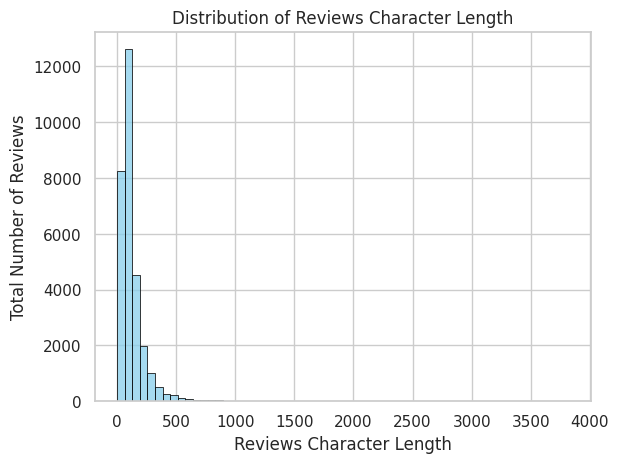

In [ ]:
# Calculate the character length of each lemmatized review
character_length = df_sent['review_lemmatize'].apply(len)

# Plot the distribution
sns.histplot(character_length, bins=60, kde=False, color='skyblue', edgecolor='black')
plt.xlabel("Reviews Character Length")
plt.ylabel("Total Number of Reviews")
plt.title("Distribution of Reviews Character Length")
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
skewness = skew(character_length)

# Print skewness and kurtosis values
print(f"Skewness: {skewness}")

Skewness: 6.317202546365343


Skewness:

- Skewness measures the asymmetry of a distribution.
If skewness is less than 0, the distribution is left-skewed (negatively skewed).
- If skewness is greater than 0, the distribution is right-skewed (positively skewed).
- If skewness is close to 0, the distribution is approximately symmetric.



Slightly right skewed distribution

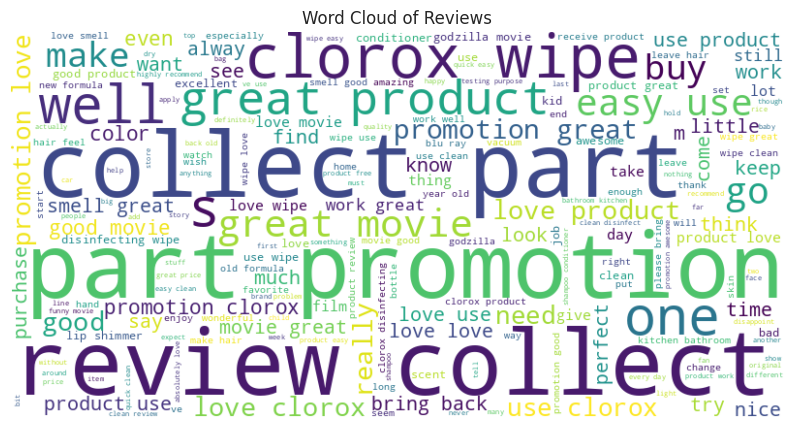

In [ ]:
from wordcloud import WordCloud

# Concatenate all reviews into a single string
all_reviews = ' '.join(df_sent['review_lemmatize'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud of Reviews')
plt.show()

# **Feature Extraction**

Step 1 : Extraction of feature using TF-IDF.

Step 2 : Spliting the data into Training and Testing.

Step 3 : Removing the imbalance from the data Using SMOTE technique.

**TF-IDF Feature Extration** :  It is a technique in which raw textual data is converted into Matrix of TF-IDF feature i.e., Numbers.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [ ]:
# Initializing the TF-IDF Vectorizer
tf_idf = TfidfVectorizer(min_df = 5, max_df = 0.95, stop_words = "english", ngram_range = (1,2))

min_df = 5 : It is used for removing terms that appear too infrequently min_df = 5 means "ignore terms that appear in less than 5 complaints"

max_df = 0.95 : It will remove the features that are appeared more than 95% in each sentance.

stop_words : used to remove the stop words from the feature.

ngram_range = (1,2): It means both unigram and bigram are extracted from the feature.  

In [ ]:
X = tf_idf.fit_transform(df_sent["review_lemmatize"])
y = df_sent["user_sentiment"]

Train Test Spliting

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.25)

In [ ]:
print("Train Shape : " , X_train.shape, y_train.shape)
print("Test Shape : " , X_test.shape, y_test.shape)

Train Shape :  (22311, 15945) (22311,)
Test Shape :  (7437, 15945) (7437,)


**Class ImBalance Check**

In [ ]:
df_sent["user_sentiment"].value_counts(normalize = True)

Positive    0.887892
Negative    0.112108
Name: user_sentiment, dtype: float64

In [ ]:
df_sent.head(2)

,id,name,reviews_combined,user_sentiment,review_cleaned,review_lemmatize
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Positive,love album 's good hip hop side current pop so...,love album 's good hip hop side current pop so...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Positive,good flavor review collected part promotion good,good flavor review collect part promotion good


From the above, we can conclude that the dataset is heavy class imbalanced.

positive sentiment make up 89% of the data and negative sentiment make up only 11%.

We will use SMOTE (Synthetic Minority Oversampling Technique) for oversampling method that generates synthetic samples for the minority class.

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
counter = Counter(y_train)
print("Before handling imbalance", counter)

#oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

counter = Counter(y_train_sm)
print("After handling imbalance", counter)

Before handling imbalance Counter({'Positive': 19786, 'Negative': 2525})
After handling imbalance Counter({'Positive': 19786, 'Negative': 19786})


# Model Building

We are going to use the following models in this analysis:-

1. Logistic Regression
2. XGBoost
3. Random Forest

In [ ]:
from sklearn.metrics import confusion_matrix

def evaluate_ml_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)

    # Calculate metrics
    true_negative, false_positive, false_negative, true_positive = cm.ravel()
    accuracy = (true_positive + true_negative) / np.sum(cm)
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Calculate specificity
    specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) != 0 else 0

    # Print metrics
    print("\nAccuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Specificity:", specificity)
    print("F1 Score:", f1)

    # Create a dictionary to store metrics
    metrics_dict = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1 Score': f1
    }

    return metrics_dict

# Example usage:
# metrics_result = evaluate_ml_model(your_classifier, X_test_data, y_test_data)
# print(metrics_result)


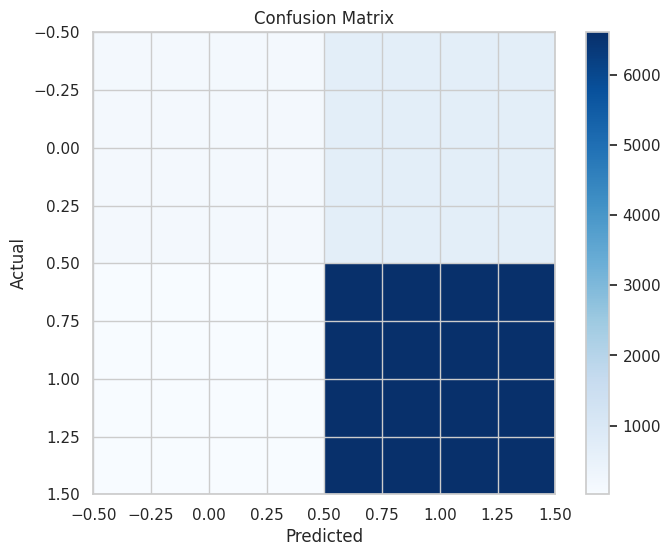

Confusion Matrix:
[[ 132  678]
 [  24 6603]]

Accuracy: 0.9056070996369504
Precision: 0.9068809229501442
Recall: 0.9963784517881394
Specificity: 0.16296296296296298
F1 Score: 0.949525452976704
Logistic Regression Metrics: {'Accuracy': 0.9056070996369504, 'Precision': 0.9068809229501442, 'Recall': 0.9963784517881394, 'Specificity': 0.16296296296296298, 'F1 Score': 0.949525452976704}


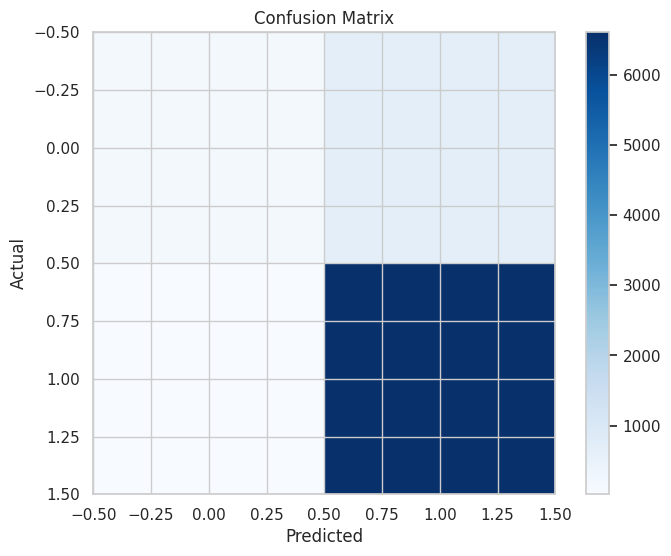

Confusion Matrix:
[[ 165  645]
 [  24 6603]]

Accuracy: 0.9100443727309399
Precision: 0.9110099337748344
Recall: 0.9963784517881394
Specificity: 0.2037037037037037
F1 Score: 0.9517837837837838
Random Forest Metrics: {'Accuracy': 0.9100443727309399, 'Precision': 0.9110099337748344, 'Recall': 0.9963784517881394, 'Specificity': 0.2037037037037037, 'F1 Score': 0.9517837837837838}


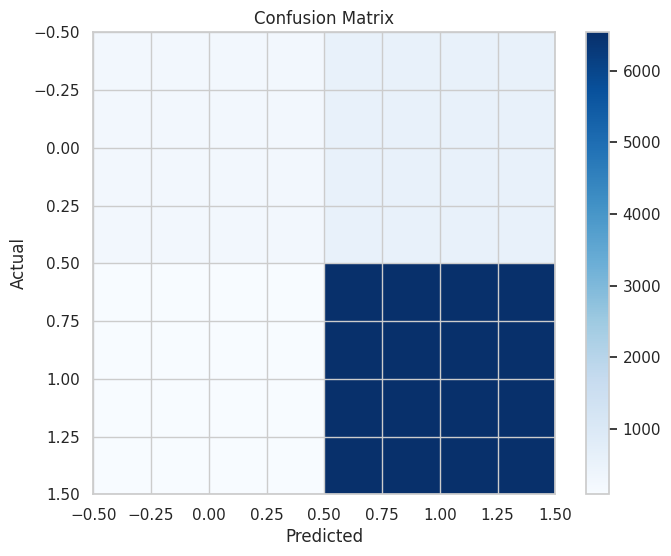

Confusion Matrix:
[[ 248  562]
 [  91 6536]]

Accuracy: 0.9121957778674197
Precision: 0.9208227669766131
Recall: 0.986268296363362
Specificity: 0.30617283950617286
F1 Score: 0.9524225865209472
XGBoost Metrics: {'Accuracy': 0.9121957778674197, 'Precision': 0.9208227669766131, 'Recall': 0.986268296363362, 'Specificity': 0.30617283950617286, 'F1 Score': 0.9524225865209472}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


# Create Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train, y_train)

# Create Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Assume you have your features in X and labels in y
# Convert labels to numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_train)

# Create XGBoost classifier
xgboost_classifier = XGBClassifier(random_state=42)
xgboost_classifier.fit(X_train, y)

# Example usage:
# Evaluate Logistic Regression classifier
logistic_regression_metrics = evaluate_ml_model(logistic_regression_classifier, X_test, y_test)
print("Logistic Regression Metrics:", logistic_regression_metrics)

# Evaluate Random Forest classifier
random_forest_metrics = evaluate_ml_model(random_forest_classifier, X_test, y_test)
print("Random Forest Metrics:", random_forest_metrics)

# Evaluate XGBoost classifier
y = label_encoder.fit_transform(y_test)
xgboost_metrics = evaluate_ml_model(xgboost_classifier, X_test, y)
print("XGBoost Metrics:", xgboost_metrics)

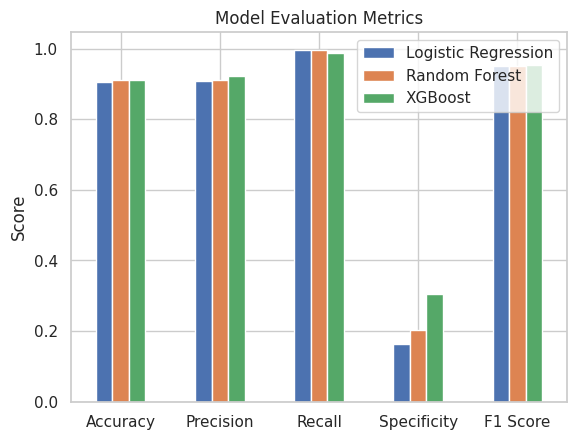

             Logistic Regression  Random Forest   XGBoost
Accuracy                0.905607       0.910044  0.912196
Precision               0.906881       0.911010  0.920823
Recall                  0.996378       0.996378  0.986268
Specificity             0.162963       0.203704  0.306173
F1 Score                0.949525       0.951784  0.952423


In [ ]:
# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Logistic Regression': logistic_regression_metrics.values(),
    'Random Forest': random_forest_metrics.values(),
    'XGBoost': xgboost_metrics.values()
}, index=logistic_regression_metrics.keys())

# Plotting the metrics
metrics_df.plot(kind='bar', rot=0)
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()

# Display the metrics table
print(metrics_df)

Considerations:

- If maximizing accuracy is crucial and you have a balanced dataset, XGBoost has the highest accuracy.

- If precision is more important (minimizing false positives), XGBoost also performs the best.

- If recall is critical (minimizing false negatives), all models have similar high recall.

- If dealing with imbalanced classes and considering F1 score, all models are close, but XGBoost has a slight edge.

In summary, based on the given metrics, XGBoost seems to be a strong performer across multiple metrics.





